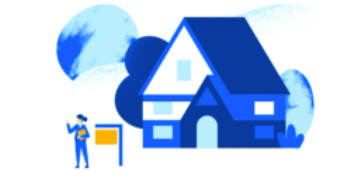

In [53]:
# ignore warnings
import warnings
warnings.filterwarnings("ignore")

# Wrangling
import pandas as pd
import numpy as np

# Exploring
import scipy.stats as stats

# Visualizing
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
import env
import visuals
from scipy.stats import f_oneway

import wrangle_zillow
import scipy.stats as stats

from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression, LassoLars, TweedieRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error

pd.options.display.max_rows = 100 

# default pandas decimal number display format
pd.options.display.float_format = '{:20,.2f}'.format


# Zillow 2017 Report: Identifying drivers of logerror

<hr style="border-top: 10px groove LightCyan ; margin-top: 1px; margin-bottom: 1px"></hr>

### Project Overview 
Buy a home? Rent a home? Sell a home? With just the click of a mouse you can enter a portal and (possibly) make a life changing decision. Zillow, founded in 2006, was created by former Microsoft executives Rich Barton and Lloyd Frink. It is my suspicion that one of them might have tripped over his wife’s stack of home and garden magazines and thought, ’I should put houses for sale online!’ Although I am probably wrong, it is fun to imagine the seed that started Zillow. For the fiscal year 2020, Zillow reported revenues of 3.4 billion dollars. Future homeowners, real estate agents, investors, and bored housewives alike flock to Zillow everyday to imagine a new life. Could we retire to Florida? How much does the home cost? How much could we sell our current home for? Does the new home have neighborhood amenities? How much are the property taxes? Is there an HOA? Zillow has made a name for itself in the housing market providing customers a wealth of information at their fingertips. Included in this information, is the industry exclusive Zillow ‘Zestimate’. A ‘Zestimate’ is Zillow’s published approximation of what a home is worth today. While it’s accuracy  fluctuates from city to city, Zillow claims the "nationwide median error rate for on-market homes is 1.9%." This project is dedicated to identifying the drivers of this error rate. This project includes all steps of the data science pipeline. 

<hr style="border-top: 3px groove LightCyan ; margin-top: 1px; margin-bottom: 1px"></hr>

### Project Goal 
The goal of this project is to find key drivers of logerror for single unit properties with a transaction date of 2017. If any of these insights are new, Zillow can use them to create a better algorithm for more accurate Zestimates.

<hr style="border-top: 3px groove LightCyan ; margin-top: 1px; margin-bottom: 1px"></hr>

### Deliverables: 
- A final notebook 
- A README
- Wrangle.py 

<hr style="border-top: 3px groove LightCyan ; margin-top: 1px; margin-bottom: 1px"></hr>

### Data Acquisition 
- Data was acquired from Codeup SQL Database: Zillow Table

In [2]:
df = wrangle_zillow.acquire()

<hr style="border-top: 3px groove LightCyan ; margin-top: 1px; margin-bottom: 1px"></hr>

### Data Preparation 

- Filtered properties by propertylanduse desc to only include: 
    -Single Family Residential 
    -Mobile Home 
    -Manufactured
    -Modular 
    -Prefabricated Homes 
    -Residential General 
    -Townhouse 
- Dropped units over count 'one'
- Dropped all columns that had 50% or more missing values 
- Dropped columns: 
    - transactiondate: feature used to filter data, will not use in modeling 
    - parcelid: unique identifier, will not be useful for modeling 
    - unitcnt: only one value per row: 1; will not be useful for modeling 
    - id: unique identifier, will not be useful for modeling 
    - heatingorsystemdesc, buildingqualitytypeid, heatingorsystemtypeid, propertyzoningdesc, propertylandusedesc, propertycountylandusecode: over 20 percent null values - did not want to impute or drop null values
- Dropped all rows with null values: at this point all rows were missing less than 5% of the data 
- Created New Features: 
    - age: 2017 - yearbuilt 
    - logerror: absolute value of logerror
    - sqft_age: calculatedfinishedsquarefeet/age 
    - sqft_structuretax: calculatedfinishedsquarefeet/structuretaxvaluedollarcnt
    - Sqft_taxvalue: calculatedfinishedsquarefeet/taxvaluedollarcnt
    - Sqft_landtax: calculatedfinishedsquarefeet/landtaxvaluedollarcnt
    - Sqft_taxamount: calculatedfinishedsquarefeet/taxamount
    - age_structuretax: age/structuretaxvaluedollarcnt
    - age_taxvalue: age/taxvaluedollarcnt 
    - age_landtax: age/landtaxvaluedollarcnt
    - age_taxamount: age/taxamount
    - structuretax_taxvalue: structuretaxvaluecnt/taxvaluedollarcnt
    - structuretax_landtax: structuretaxvaluedollarcnt/landtaxvaluedollarcnt
    - Landtax_taxamount: landtaxvaluedollarcnt/taxamount
    - structuretax_taxamount: structuretaxvaluedollarcnt/ taxamount 
    - taxvalue_landtax: taxvaluedollarcnt/ landtaxvaluedollarcnt 
    - taxvalue_taxamount: taxvaluedollarcnt/ taxamount
- Started with (77380, 68) ended with (50616, 40)
- Retain 65% of data 

In [3]:
#prepare the data, includes all steps listed above 
df = wrangle_zillow.prepare_data(df)

In [4]:
#split the data
train, validate, test = wrangle_zillow.split_zillow_data(df)

<hr style="border-top: 3px groove LightCyan ; margin-top: 1px; margin-bottom: 1px"></hr>

# Exploration

<hr style="border-top: 10px groove LightCyan ; margin-top: 1px; margin-bottom: 1px"></hr>

### Exploration Questions 
- Is there a relationship between taxvalue_taxamount feature and logerror? 
- Is there a relationship between structuretax_taxamount feature and logerror? 
- Is there a relationship between Sqft_structuretax feature and logerror? 
- Is there a relationship between landtax_taxamount feature and logerror? 
- Is there a relationship between Structuretax_landtax and logerror? 


<hr style="border-top: 3px groove LightCyan ; margin-top: 1px; margin-bottom: 1px"></hr>

### Is there a relationship between taxvalue_taxamount feature and log error?

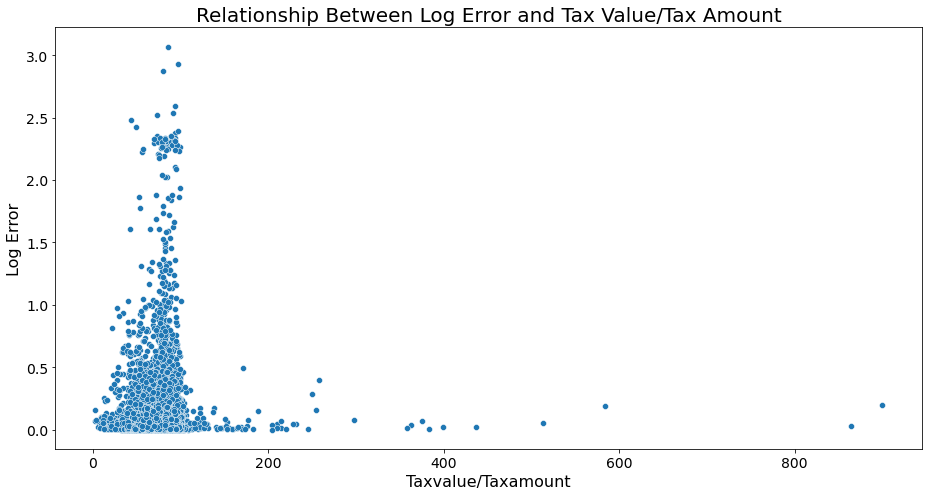

In [5]:
x = train.taxvalue_taxamount
y = train.logerror
# Set size of figure
plt.figure(figsize = (13,7))
# Create scatterplot
ax = sns.scatterplot(data=train, x= x, y= y)
# fit labels and legend
plt.title('Relationship Between Log Error and Tax Value/Tax Amount', fontsize = 20)
plt.xlabel('Taxvalue/Taxamount', fontsize = 16)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.ylabel('Log Error', fontsize = 16)


plt.tight_layout() 
plt.show()


In [6]:
# H0 - There is no linear relationship between taxvalue_taxamount and logerror.
# H1 - There is a linear realtionship between taxvalue_taxamount and log error.
α = 0.05
r, p = stats.pearsonr(x,y)
print('r =', r)
print('p =', p)
if p < α:
    print("We reject the H0.")
else:
    print("We fail to reject the H0.")

r = -0.018478104183107275
p = 0.0018687930049487945
We reject the H0.


### Key Takeaways: 
- There is no obvious relationship between feature taxvalue_taxamount and logerror 

<hr style="border-top: 3px groove LightCyan ; margin-top: 1px; margin-bottom: 1px"></hr>

### Is there a relationship between structuretax_taxamount feature and logerror?

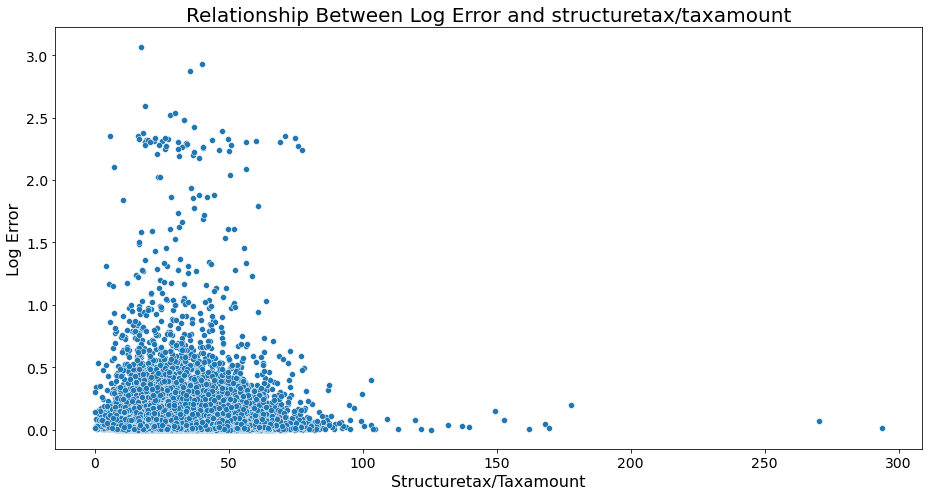

In [7]:
x = train.structuretax_taxamount
y = train.logerror
# Set size of figure
plt.figure(figsize = (13,7))
# Create scatterplot
ax = sns.scatterplot(data=train, x= x, y= y)
# fit labels and legend
plt.title('Relationship Between Log Error and structuretax/taxamount', fontsize = 20)
plt.xlabel('Structuretax/Taxamount', fontsize = 16)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.ylabel('Log Error', fontsize = 16)


plt.tight_layout() 
plt.show()

<hr style="border-top: 2px groove LightCyan ; margin-top: 1px; margin-bottom: 1px"></hr>

In [8]:
# H0 - There is no linear relationship between structuretax_taxamount and logerror.
# H1 - There is a linear realtionship between structuretax_taxamount and log error.
α = 0.05
r, p = stats.pearsonr(x,y)
print('r =', r)
print('p =', p)
if p < α:
    print("We reject the H0.")
else:
    print("We fail to reject the H0.")

r = -0.023277153849625875
p = 8.91662532138565e-05
We reject the H0.


### Key Takeaways: 
- There appears to be a relationship between feature structuretax_taxamount and logerror. Pearson's test rejects the null hypothesis. 

<hr style="border-top: 3px groove LightCyan ; margin-top: 1px; margin-bottom: 1px"></hr>

### Is there a relationship between Sqft_structuretax and logerror?

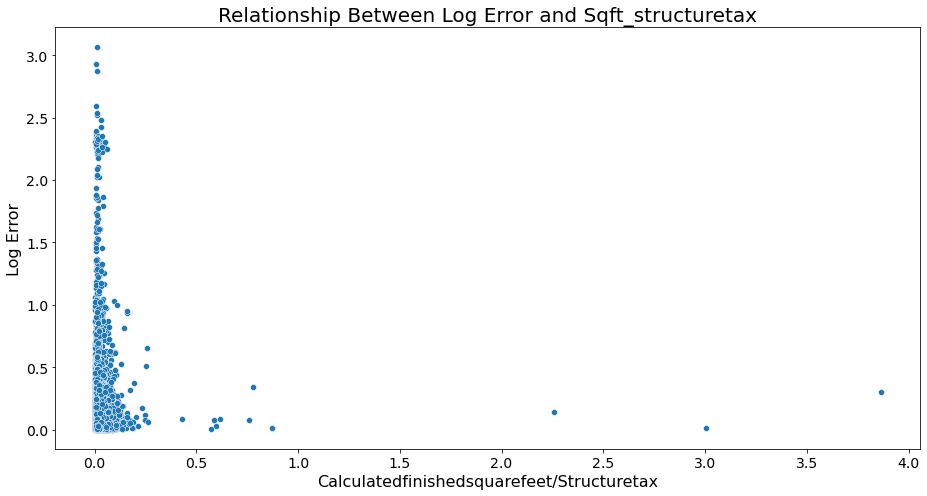

In [9]:
x = train.Sqft_structuretax
y = train.logerror
# Set size of figure
plt.figure(figsize = (13,7))
# Create scatterplot
ax = sns.scatterplot(data=train, x= x, y= y)
# fit labels and legend
plt.title('Relationship Between Log Error and Sqft_structuretax', fontsize = 20)
plt.xlabel('Calculatedfinishedsquarefeet/Structuretax', fontsize = 16)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.ylabel('Log Error', fontsize = 16)


plt.tight_layout() 
plt.show()

<hr style="border-top: 3px groove LightCyan ; margin-top: 1px; margin-bottom: 1px"></hr>

In [10]:
# H0 - There is no linear relationship between Sqft_structuretax and logerror.
# H1 - There is a linear realtionship between Sqft_structuretax and logerror.
α = 0.05
r, p = stats.pearsonr(x,y)
print('r =', r)
print('p =', p)
if p < α:
    print("We reject the H0.")
else:
    print("We fail to reject the H0.")

r = 0.032934335905807396
p = 2.9444855230170447e-08
We reject the H0.


### Key Takeaway: 

- There is no obvious relationship between feature taxvalue_taxamount and logerror 


<hr style="border-top: 3px groove LightCyan ; margin-top: 1px; margin-bottom: 1px"></hr>

### Is there a relationship between landtax_taxamount and logerror?

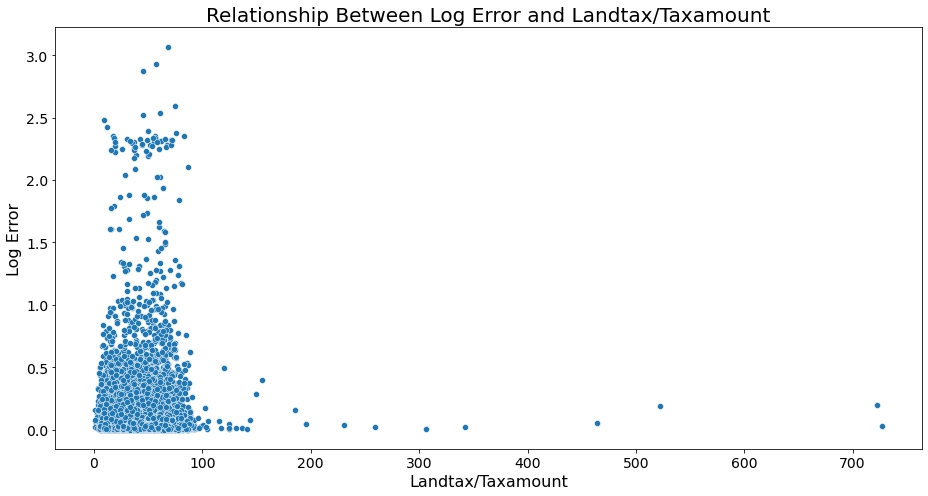

In [11]:
x = train.Landtax_taxamount
y = train.logerror
# Set size of figure
plt.figure(figsize = (13,7))
# Create scatterplot
ax = sns.scatterplot(data=train, x= x, y= y)
# fit labels and legend
plt.title('Relationship Between Log Error and Landtax/Taxamount', fontsize = 20)
plt.xlabel('Landtax/Taxamount', fontsize = 16)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.ylabel('Log Error', fontsize = 16)


plt.tight_layout() 
plt.show()

<hr style="border-top: 3px groove LightCyan ; margin-top: 1px; margin-bottom: 1px"></hr>

In [12]:
# H0 - There is no linear relationship between Landtax_taxamount and logerror.
# H1 - There is a linear realtionship between Landtax_taxamount and logerror.
α = 0.05
r, p = stats.pearsonr(x,y)
print('r =', r)
print('p =', p)
if p < α:
    print("We reject the H0.")
else:
    print("We fail to reject the H0.")

r = 0.002142939765551663
p = 0.7183385587702065
We fail to reject the H0.


### Key Takeaway:

- There is no obvious relationship between feature Landtax_taxamount and logerror 


<hr style="border-top: 3px groove LightCyan ; margin-top: 1px; margin-bottom: 1px"></hr>

### Is there a relationship between Structuretax_landtax and logerror?

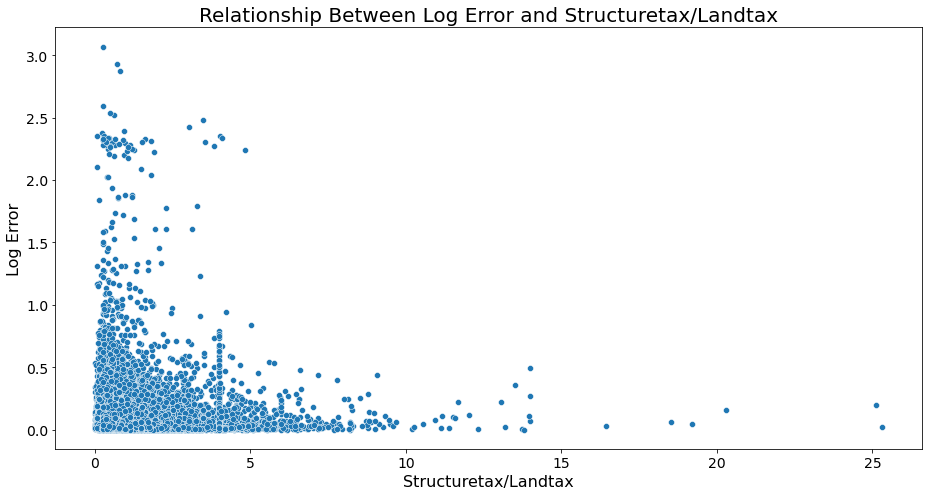

In [13]:
x = train.Structuretax_landtax
y = train.logerror
# Set size of figure
plt.figure(figsize = (13,7))
# Create scatterplot
ax = sns.scatterplot(data=train, x= x, y= y)
# fit labels and legend
plt.title('Relationship Between Log Error and Structuretax/Landtax', fontsize = 20)
plt.xlabel('Structuretax/Landtax', fontsize = 16)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.ylabel('Log Error', fontsize = 16)


plt.tight_layout() 
plt.show()

In [14]:
# H0 - There is no linear relationship between structuretax_landtax and logerror.
# H1 - There is a linear realtionship between structuretax_landtax and logerror.
α = 0.05
r, p = stats.pearsonr(x,y)
print('r =', r)
print('p =', p)
if p < α:
    print("We reject the H0.")
else:
    print("We fail to reject the H0.")

r = -0.00651906692448219
p = 0.27253625769753653
We fail to reject the H0.


### Key Takeaway:

- There is no obvious relationship between feature structuretax_landtax and logerror 


<hr style="border-top: 3px groove LightCyan ; margin-top: 1px; margin-bottom: 1px"></hr>

### Set X and y for clustering and modeling 

In [15]:
target = "logerror"
columns = ['Structuretax_landtax', 'Landtax_taxamount', 'Sqft_structuretax', 'structuretax_taxamount', 'taxvalue_taxamount']

X_train = train[columns]
y_train = train[target]


X_validate = validate[columns]
y_validate = validate[target]


X_test = test[columns]
y_test = test[target]

<hr style="border-top: 10px groove LightCyan ; margin-top: 1px; margin-bottom: 1px"></hr>

# Clustering 


### Items to cluster on: 
- Structuretax_landtax
- Landtax_taxamount
- Sqft_structuretax


<hr style="border-top: 3px groove LightCyan ; margin-top: 1px; margin-bottom: 1px"></hr>

### Structure Tax and Land Tax Cluster 

In [16]:
#scale the data 
cluster_vars = ['Structuretax_landtax']
cluster_name = 'structuretax_landtax'

scaler = MinMaxScaler()

scaler.fit(X_train[cluster_vars])

X_train_scaled = scaler.transform(X_train[cluster_vars])

In [17]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(X_train_scaled)

kmeans.predict(X_train_scaled)

array([1, 2, 1, ..., 1, 2, 1], dtype=int32)

In [18]:
train['structuretax_landtax_cluster'] = kmeans.predict(X_train_scaled)

Text(0.5, 1.0, 'Train data with Cluster Groups')

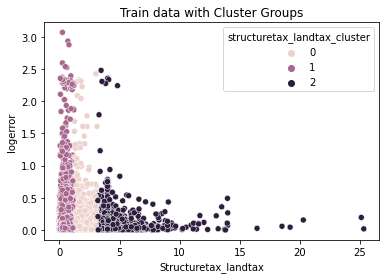

In [19]:
sns.scatterplot(x='Structuretax_landtax', y='logerror', hue='structuretax_landtax_cluster', data=train)
plt.title('Train data with Cluster Groups')

In [20]:
train.groupby('structuretax_landtax_cluster')[ 'Structuretax_landtax', 'logerror'].median()

,Structuretax_landtax,logerror
structuretax_landtax_cluster,,
0,1.76,0.03
1,0.49,0.03
2,4.00,0.03


In [21]:
structure_landtax_0=train[train.structuretax_landtax_cluster == 0]
structure_landtax_1=train[train.structuretax_landtax_cluster == 1]
structure_landtax_2=train[train.structuretax_landtax_cluster == 2]

<hr style="border-top: 3px groove LightCyan ; margin-top: 1px; margin-bottom: 1px"></hr>

### Land Tax and Tax Amount Cluster

In [22]:
#scale the data 
cluster_vars = ['Landtax_taxamount']
cluster_name = 'Landtax_taxamount'

scaler = MinMaxScaler()

scaler.fit(X_train[cluster_vars])

X_train_scaled = scaler.transform(X_train[cluster_vars])

In [23]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(X_train_scaled)

kmeans.predict(X_train_scaled)

array([0, 2, 1, ..., 1, 2, 0], dtype=int32)

In [24]:
train['Landtax_taxamount_cluster'] = kmeans.predict(X_train_scaled)

Text(0.5, 1.0, 'Train data with Cluster Groups')

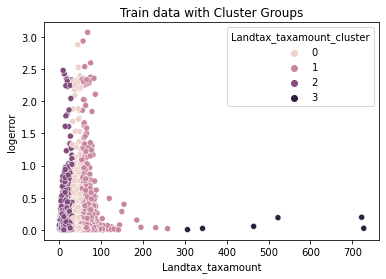

In [25]:
sns.scatterplot(x='Landtax_taxamount', y='logerror', hue='Landtax_taxamount_cluster', data=train)
plt.title('Train data with Cluster Groups')

In [26]:
train.groupby('Landtax_taxamount_cluster')[ 'Landtax_taxamount', 'logerror'].median()

,Landtax_taxamount,logerror
Landtax_taxamount_cluster,,
0,43.38,0.03
1,63.99,0.03
2,20.69,0.03
3,493.42,0.04


In [27]:
Landtax_taxamount_0=train[train.Landtax_taxamount_cluster == 'cluster_0']
Landtax_taxamount_1=train[train.Landtax_taxamount_cluster == 'cluster_1']
Landtax_taxamount_2=train[train.Landtax_taxamount_cluster == 'cluster_2']
Landtax_taxamount_3=train[train.Landtax_taxamount_cluster == 'cluster_3']

<hr style="border-top: 3px groove LightCyan ; margin-top: 1px; margin-bottom: 1px"></hr>

### Square Feet and Structure Tax Cluster 

In [28]:
#scale the data 
cluster_vars = ['Sqft_structuretax']
cluster_name = 'Sqft_structureamount'

scaler = MinMaxScaler()

scaler.fit(X_train[cluster_vars])

X_train_scaled = scaler.transform(X_train[cluster_vars])

In [29]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(X_train_scaled)

kmeans.predict(X_train_scaled)

array([0, 0, 0, ..., 0, 2, 0], dtype=int32)

In [30]:
train['Sqft_structuretax_cluster'] = kmeans.predict(X_train_scaled)

Text(0.5, 1.0, 'Train data with Cluster Groups')

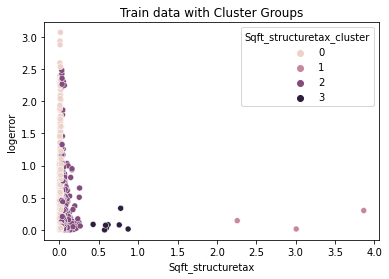

In [31]:
sns.scatterplot(x='Sqft_structuretax', y='logerror', hue='Sqft_structuretax_cluster', data=train)
plt.title('Train data with Cluster Groups')

In [32]:
train.groupby('Sqft_structuretax_cluster')[ 'Sqft_structuretax', 'logerror'].median()

,Sqft_structuretax,logerror
Sqft_structuretax_cluster,,
0,0.01,0.03
1,3.01,0.14
2,0.04,0.04
3,0.61,0.08


In [33]:
Landtax_taxamount_0=train[train.Sqft_structuretax_cluster == 'cluster_0']
Landtax_taxamount_1=train[train.Sqft_structuretax_cluster == 'cluster_1']
Landtax_taxamount_2=train[train.Sqft_structuretax_cluster == 'cluster_2']
Landtax_taxamount_3=train[train.Sqft_structuretax_cluster == 'cluster_3']

### Key Takeaway: 
- Sqft_structuretax had the widest variance of logerrors between the clusters 


<hr style="border-top: 3px groove LightCyan ; margin-top: 1px; margin-bottom: 1px"></hr>

### Modeling 

### Baseline is set 

In [127]:
baseline = y_train.median()
baseline

logerror                   0.03
dtype: float64

### First Model

In [35]:
#conver y_train y _ validate to df
y_train = pd.DataFrame(y_train)
y_validate = pd.DataFrame(y_validate)
y_test = pd.DataFrame(y_test)

In [145]:
X = X_train.copy()
y = y_train.copy()

In [37]:
A = X_validate.copy()
B = y_validate.copy()

In [38]:
baseline = y_train.median()
baseline

logerror                   0.03
dtype: float64

In [39]:
df = pd.DataFrame(y)

In [40]:
df_validate = pd.DataFrame(B)

In [65]:
df['baseline'] = 0.03

In [67]:
df['baseline_residual'] = df.logerror - df.baseline
df['baseline_residual^2'] = df.baseline_residual**2

In [43]:
lm = LinearRegression()

In [44]:
lm.fit(X_train, y_train)

LinearRegression()

In [45]:
#print the coefficients 
lm.coef_[0]

array([-5.68547064e-04, -7.62979106e+10,  1.27775215e-01, -7.62979106e+10,
        7.62979106e+10])

In [46]:
#Create a dataframe with my coefficients and x columns 
cdf = pd.DataFrame(X.columns, lm.coef_[0], columns=['Coeff'])

In [47]:
predictions = lm.predict(X_train)

In [49]:
df['yhat'] = lm.predict(X_train)

In [50]:
predictions_validate = lm.predict(X_validate)

In [73]:
df_validate['pred_validate'] = predictions_validate

In [ ]:
predictions_test = lm.predict(X_test)

In [ ]:
df_validate['pred_test'] = predictions_test

In [55]:
import sklearn.metrics

In [56]:
#print metrics
mae = sklearn.metrics.mean_absolute_error(y_train, predictions)
mse = sklearn.metrics.mean_squared_error(y_train, predictions)
rmse = np.sqrt(sklearn.metrics.mean_squared_error(y_train, predictions))
ev = sklearn.metrics.explained_variance_score(y_train, predictions)
print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')
print(f'Explained Variance: {ev}')

Mean Absolute Error: 0.06730107237790497
Mean Squared Error: 0.02403306459822062
Root Mean Squared Error: 0.15502601265020208
Explained Variance: 0.0016620324225512517


In [69]:
RMSE2 = sklearn.metrics.mean_squared_error(y_train, df.yhat, squared = False)
RMSE2_baseline = sklearn.metrics.mean_squared_error(y_train, df.baseline, squared=False)

print("RMSE", RMSE2) 
print("RMSE baseline" ,RMSE2_baseline)  

RMSE 0.15502601265020208
RMSE baseline 0.16046789173425854


In [74]:
RMSE_train = sklearn.metrics.mean_squared_error(y_train, df.yhat, squared = False)
RMSE_validate = sklearn.metrics.mean_squared_error(y_validate, df_validate.pred_validate, squared = False)
RMSE_test = sklearn.metrics.mean_squared_error(y_test, )
print("RMSE In Sample", RMSE_train) 
print("RMSE out of Sample" ,RMSE_validate)

RMSE In Sample 0.15502601265020208
RMSE out of Sample 0.15143841070182773


### Second Model

In [78]:
X_train.drop(columns=['Landtax_taxamount'],inplace=True)

In [90]:
X_validate.drop(columns=['Landtax_taxamount'],inplace=True)

### Dropped Column 

In [80]:
X = X_train.copy()
y = y_train.copy()
A = X_validate.copy()
B = y_validate.copy()

In [81]:
baseline = y_train.median()
baseline

logerror                   0.03
dtype: float64

In [98]:
df = pd.DataFrame(y)
df_validate = pd.DataFrame(B)
df['baseline'] = 0.03
df['baseline_residual'] = df.logerror - df.baseline
df['baseline_residual^2'] = df.baseline_residual**2

In [99]:
lm = LinearRegression()

In [100]:
lm.fit(X_train, y_train)

LinearRegression()

In [101]:
#print the coefficients 
lm.coef_[0]

array([ 1.17132346e-03,  1.27236070e-01, -2.74562131e-04, -8.08276645e-05])

In [102]:
#Create a dataframe with my coefficients and x columns 
cdf = pd.DataFrame(X.columns, lm.coef_[0], columns=['Coeff'])

In [103]:
predictions = lm.predict(X_train)

In [104]:
df['yhat'] = lm.predict(X_train)

In [105]:
predictions_validate = lm.predict(X_validate)

In [106]:
df_validate['pred_validate'] = predictions_validate

In [107]:
#print metrics
mae = sklearn.metrics.mean_absolute_error(y_train, predictions)
mse = sklearn.metrics.mean_squared_error(y_train, predictions)
rmse = np.sqrt(sklearn.metrics.mean_squared_error(y_train, predictions))
ev = sklearn.metrics.explained_variance_score(y_train, predictions)
print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')
print(f'Explained Variance: {ev}')

Mean Absolute Error: 0.067458288323297
Mean Squared Error: 0.02403228785028766
Root Mean Squared Error: 0.1550235074119008
Explained Variance: 0.0016888518605709946


In [108]:
RMSE2 = sklearn.metrics.mean_squared_error(y_train, df.yhat, squared = False)
RMSE2_baseline = sklearn.metrics.mean_squared_error(y_train, df.baseline, squared=False)

print("RMSE", RMSE2) 
print("RMSE baseline" ,RMSE2_baseline)  

RMSE 0.1550235074119008
RMSE baseline 0.16046789173425854


In [109]:
RMSE_train = sklearn.metrics.mean_squared_error(y_train, df.yhat, squared = False)
RMSE_validate = sklearn.metrics.mean_squared_error(y_validate, df_validate.pred_validate, squared = False)

print("RMSE In Sample", RMSE_train) 
print("RMSE out of Sample" ,RMSE_validate)

RMSE In Sample 0.1550235074119008
RMSE out of Sample 0.15144851374922713


### Third Model

In [111]:
X_train.drop(columns=['Sqft_structuretax'],inplace=True)

In [112]:
X_validate.drop(columns=['Sqft_structuretax'],inplace=True)

### Dropped Columns

In [114]:
X = X_train.copy()
y = y_train.copy()
A = X_validate.copy()
B = y_validate.copy()

In [115]:
baseline = y_train.median()
baseline

logerror                   0.03
dtype: float64

In [116]:
df = pd.DataFrame(y)
df_validate = pd.DataFrame(B)
df['baseline'] = 0.03
df['baseline_residual'] = df.logerror - df.baseline
df['baseline_residual^2'] = df.baseline_residual**2

In [117]:
lm = LinearRegression()

In [118]:
lm.fit(X_train, y_train)

LinearRegression()

In [119]:
#print the coefficients 
lm.coef_[0]

array([ 0.00128661, -0.00030153, -0.00010999])

In [120]:
#Create a dataframe with my coefficients and x columns 
cdf = pd.DataFrame(X.columns, lm.coef_[0], columns=['Coeff'])

In [121]:
predictions = lm.predict(X_train)

In [122]:
df['yhat'] = lm.predict(X_train)

In [123]:
predictions_validate = lm.predict(X_validate)
df_validate['pred_validate'] = predictions_validate

In [124]:
#print metrics
mae = sklearn.metrics.mean_absolute_error(y_train, predictions)
mse = sklearn.metrics.mean_squared_error(y_train, predictions)
rmse = np.sqrt(sklearn.metrics.mean_squared_error(y_train, predictions))
ev = sklearn.metrics.explained_variance_score(y_train, predictions)
print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')
print(f'Explained Variance: {ev}')

Mean Absolute Error: 0.06756295836047635
Mean Squared Error: 0.024053255256497142
Root Mean Squared Error: 0.15509111920576607
Explained Variance: 0.0008178571597378115


In [125]:
RMSE2 = sklearn.metrics.mean_squared_error(y_train, df.yhat, squared = False)
RMSE2_baseline = sklearn.metrics.mean_squared_error(y_train, df.baseline, squared=False)

print("RMSE", RMSE2) 
print("RMSE baseline" ,RMSE2_baseline)  

RMSE 0.15509111920576607
RMSE baseline 0.16046789173425854


In [126]:
RMSE_train = sklearn.metrics.mean_squared_error(y_train, df.yhat, squared = False)
RMSE_validate = sklearn.metrics.mean_squared_error(y_validate, df_validate.pred_validate, squared = False)

print("RMSE In Sample", RMSE_train) 
print("RMSE out of Sample" ,RMSE_validate)

RMSE In Sample 0.15509111920576607
RMSE out of Sample 0.1515491207739256


### Fourth Model

In [130]:
X_train.drop(columns=['Structuretax_landtax'],inplace=True)

In [131]:
X_validate.drop(columns=['Structuretax_landtax'],inplace=True)

### Dropped Columns

In [132]:
X = X_train.copy()
y = y_train.copy()
A = X_validate.copy()
B = y_validate.copy()

In [133]:
baseline = y_train.median()
baseline

logerror                   0.03
dtype: float64

In [134]:
df = pd.DataFrame(y)
df_validate = pd.DataFrame(B)
df['baseline'] = 0.03
df['baseline_residual'] = df.logerror - df.baseline
df['baseline_residual^2'] = df.baseline_residual**2

In [135]:
lm = LinearRegression()

In [136]:
lm.fit(X_train, y_train)

LinearRegression()

In [137]:
#print the coefficients 
lm.coef_[0]

array([-0.00022172, -0.0001489 ])

In [138]:
#Create a dataframe with my coefficients and x columns 
cdf = pd.DataFrame(X.columns, lm.coef_[0], columns=['Coeff'])

In [139]:
predictions = lm.predict(X_train)

In [140]:
df['yhat'] = lm.predict(X_train)

In [141]:
predictions_validate = lm.predict(X_validate)
df_validate['pred_validate'] = predictions_validate

In [142]:
#print metrics
mae = sklearn.metrics.mean_absolute_error(y_train, predictions)
mse = sklearn.metrics.mean_squared_error(y_train, predictions)
rmse = np.sqrt(sklearn.metrics.mean_squared_error(y_train, predictions))
ev = sklearn.metrics.explained_variance_score(y_train, predictions)
print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')
print(f'Explained Variance: {ev}')

Mean Absolute Error: 0.06757518941749796
Mean Squared Error: 0.024054120977899225
Root Mean Squared Error: 0.15509391018959842
Explained Variance: 0.000781894735674582


In [143]:
RMSE2 = sklearn.metrics.mean_squared_error(y_train, df.yhat, squared = False)
RMSE2_baseline = sklearn.metrics.mean_squared_error(y_train, df.baseline, squared=False)

print("RMSE", RMSE2) 
print("RMSE baseline" ,RMSE2_baseline)  

RMSE 0.15509391018959842
RMSE baseline 0.16046789173425854


In [144]:
RMSE_train = sklearn.metrics.mean_squared_error(y_train, df.yhat, squared = False)
RMSE_validate = sklearn.metrics.mean_squared_error(y_validate, df_validate.pred_validate, squared = False)

print("RMSE In Sample", RMSE_train) 
print("RMSE out of Sample" ,RMSE_validate)

RMSE In Sample 0.15509391018959842
RMSE out of Sample 0.1515385791261354


### Key Takeaways: 
- The first model had the best out of sample rmse: 0.1514
- All models performed better than baseline 

### Conclusion 
- While we can conclude from this report that some features correlate with logerror, or show up as a feature importance on RFE, the relationships are too weak to classify any of them as a 'driver' of logerror. 


### Recommendation 
- Upon review of the clusters, I noticed certain clusters had much higher than average mean logerror values. Until more drivers of error can be identified and a better model created, I suggest posting a 'range zestimate.' Instead of valueing a property as a specific number, I would say 'based on other properties in this area, we estimate this property will sell between '280,000 and 320,000.' This will help manage consumer's expectations and secure the reputation of the company. 

### With more time I would like to: 
- perform an rfe identifying which cluster numbers show up as feature importance and run more models 
- apply transformations to the models to see if it will help the data perform better 